Original Grid:
S . . . .
X X . X .
. P P . .
. X . . D
. . . X .

Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4)]
Total cost: 6.5 

Grid with Path:
S * * . .
X X * X .
. P * . .
. X * * D
. . . X .



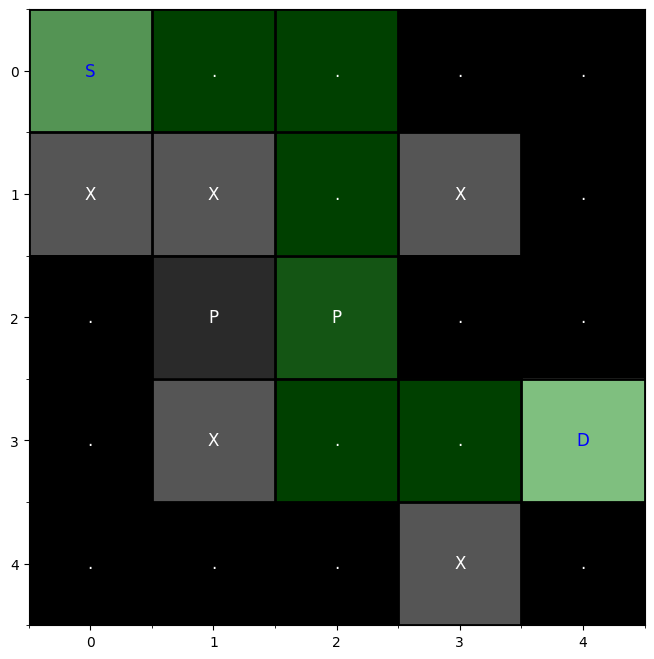

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class DijkstraPathfinder:
    def __init__(self, grid):
        self.grid = grid
        self.rows = len(grid)
        self.cols = len(grid[0])
        self.directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        self.cost_map = {
            '.': 1,
            'P': 0.5,
            'S': 0,
            'D': 1
        }

    def get_cost(self, current, neighbor, direction):
        r, c = neighbor
        cell = self.grid[r][c]
        move_cost = self.cost_map.get(cell, 1)
        return move_cost

    def get_neighbors(self, r, c):
        for dr, dc in self.directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < self.rows and 0 <= nc < self.cols and self.grid[nr][nc] != 'X':
                yield (nr, nc), (dr, dc)

    def dijkstra(self, start, destination):
        unvisited = set((r, c) for r in range(self.rows) for c in range(self.cols) if self.grid[r][c] != 'X')
        costs = {pos: float('inf') for pos in unvisited}                                                                 # Sets initial costs to infinity other than start
        parents = {}
        costs[start] = 0


                                                                                                                        
        while unvisited:                                                                                                 # Main loop
            current = min(unvisited, key=lambda pos: costs[pos])                                                         # selects smallest cost
            if current == destination:                                                                                   # exits loop on reaching destination
                break

            unvisited.remove(current)
            r, c = current

            for neighbor, direction in self.get_neighbors(r, c):                                                         # checks neighbors weights
                if neighbor not in unvisited:
                    continue
                new_cost = costs[current] + self.get_cost(current, neighbor, direction)
                if new_cost < costs[neighbor]:
                    costs[neighbor] = new_cost
                    parents[neighbor] = current

        path = []                                                                                                        # Reconstructs the path using parent pointers
        cur = destination
        while cur in parents:
            path.append(cur)
            cur = parents[cur]
        if cur == start:                                                                                                 # reverses the list
            path.append(start)
            path.reverse()
            return costs[destination], path
        else:       
            return float('inf'), []                                                                                      # no path


def find_start_end(grid):                                                                                                # finds start and end
    start = end = None
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            if grid[r][c] == 'S':
                start = (r, c)
            elif grid[r][c] == 'D':
                end = (r, c)
    return start, end

def grid_path_visualization(grid, path):                                                                                # visualizes the grid and path using matplotlib
    plot_grid = np.zeros((len(grid), len(grid[0])))

    for r in range(len(grid)):
        for c in range(len(grid[0])):
            cell = grid[r][c]
            if cell == 'S':
                plot_grid[r][c] = 2
            elif cell == 'D':
                plot_grid[r][c] = 3
            elif cell == 'X':
                plot_grid[r][c] = 1
            elif cell == 'P':
                plot_grid[r][c] = 0.5
            else:
                plot_grid[r][c] = 0

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(plot_grid, cmap='gray', interpolation='nearest')

    ax.set_xticks(np.arange(-0.5, len(grid[0]), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(grid), 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    for r in range(len(grid)):
        for c in range(len(grid[0])):
            cell = grid[r][c]
            if cell in ['S', 'D']:
                ax.text(c, r, cell, ha='center', va='center', color='blue', fontsize=12)
            else:
                ax.text(c, r, cell, ha='center', va='center', color='white', fontsize=12)

    for (r, c) in path:
        ax.add_patch(plt.Rectangle((c - 0.5, r - 0.5), 1, 1, color='green', alpha=0.5))

    plt.show()

def print_grid_with_path(grid, path):
    # grid copy to append path
    grid_with_path = [row.copy() for row in grid]

    for (r, c) in path:
        if grid_with_path[r][c] not in ('S', 'D'):
            grid_with_path[r][c] = '*'

    print("Grid with Path:")
    for row in grid_with_path:
        print(' '.join(row))
    print()


# usages
warehouse_map = [
    ['S', '.', '.', '.', '.'],
    ['X', 'X', '.', 'X', '.'],
    ['.', 'P', 'P', '.', '.'],
    ['.', 'X', '.', '.', 'D'],
    ['.', '.', '.', 'X', '.']
]

start, end = find_start_end(warehouse_map)
pathfinder = DijkstraPathfinder(warehouse_map)
total_cost, path = pathfinder.dijkstra(start, end)

if path:
    print("Original Grid:")
    for row in warehouse_map:
        print(' '.join(row))
    print()

    print("Path:", path)
    print("Total cost:", total_cost, "\n")
    print_grid_with_path(warehouse_map, path)

    grid_path_visualization(warehouse_map, path)
else:
    print("No path found.")


NO OBSTACLE Grid:
S . . . .
. . . . .
. . . . .
. . . . .
. . . . D

Path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 4)]
Total cost: 8 

Grid with Path:
S . . . .
* . . . .
* . . . .
* * * * *
. . . . D



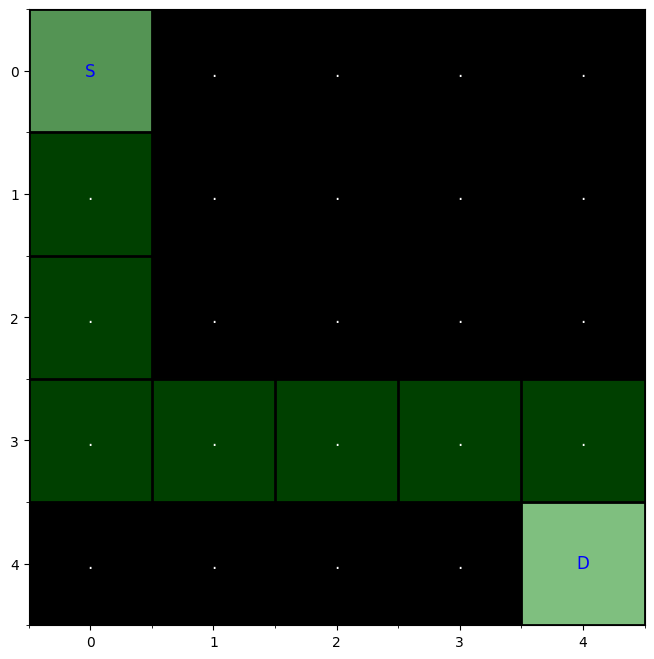

In [8]:
# Test Case 1: No Obstacles
warehouse_map = [
    ['S', '.', '.', '.', '.'],
    ['.', '.', '.', '.', '.'],
    ['.', '.', '.', '.', '.'],
    ['.', '.', '.', '.', '.'],
    ['.', '.', '.', '.', 'D']
]

start, end = find_start_end(warehouse_map)
pathfinder = DijkstraPathfinder(warehouse_map)
total_cost, path = pathfinder.dijkstra(start, end)

if path:
    print("NO OBSTACLE Grid:")
    for row in warehouse_map:
        print(' '.join(row))
    print()

    print("Path:", path)
    print("Total cost:", total_cost, "\n")
    print_grid_with_path(warehouse_map, path)

    grid_path_visualization(warehouse_map, path)
else:
    print("No path found.")

OBSTACLES PRESENT Grid:
S . X . .
X . X . .
. . . . .
. . . . .
. . . . D

Path: [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (4, 4)]
Total cost: 8 

Grid with Path:
S * X . .
X * X . .
. * . . .
. * * * *
. . . . D



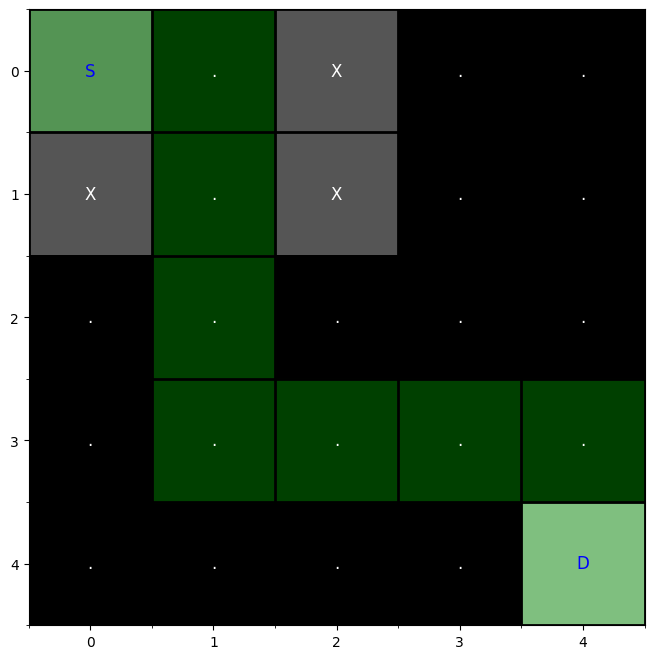

In [7]:
# Test Case 2: Obstacles Present
warehouse_map = [
    ['S', '.', 'X', '.', '.'],
    ['X', '.', 'X', '.', '.'],
    ['.', '.', '.', '.', '.'],
    ['.', '.', '.', '.', '.'],
    ['.', '.', '.', '.', 'D']
]

start, end = find_start_end(warehouse_map)
pathfinder = DijkstraPathfinder(warehouse_map)
total_cost, path = pathfinder.dijkstra(start, end)

if path:
    print("OBSTACLES PRESENT Grid:")
    for row in warehouse_map:
        print(' '.join(row))
    print()

    print("Path:", path)
    print("Total cost:", total_cost, "\n")
    print_grid_with_path(warehouse_map, path)

    grid_path_visualization(warehouse_map, path)
else:
    print("No path found.")

PRIORITY PATHWAYS Grid:
S . . . .
X X P P .
. . . . .
. . . . .
. X . . D

Path: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3), (3, 4), (4, 4)]
Total cost: 7.0 

Grid with Path:
S * * . .
X X * * .
. . . * .
. . . * *
. X . . D



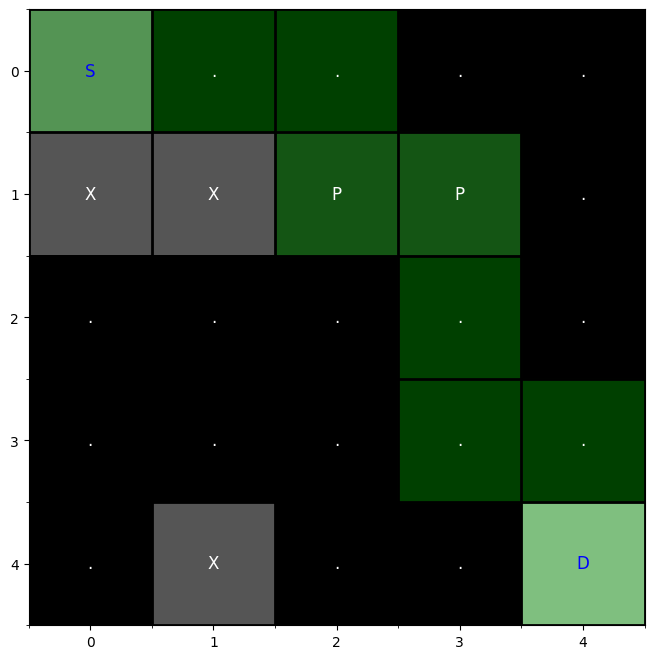

In [10]:
# Test Case 3: PRIORITY PATHWAYS
warehouse_map = [
    ['S', '.', '.', '.', '.'],
    ['X', 'X', 'P', 'P', '.'],
    ['.', '.', '.', '.', '.'],
    ['.', '.', '.', '.', '.'],
    ['.', 'X', '.', '.', 'D']
]

start, end = find_start_end(warehouse_map)
pathfinder = DijkstraPathfinder(warehouse_map)
total_cost, path = pathfinder.dijkstra(start, end)

if path:
    print("PRIORITY PATHWAYS Grid:")
    for row in warehouse_map:
        print(' '.join(row))
    print()

    print("Path:", path)
    print("Total cost:", total_cost, "\n")
    print_grid_with_path(warehouse_map, path)

    grid_path_visualization(warehouse_map, path)
else:
    print("No path found.")

NO PATH Grid:
S X . . .
X X . . .
. . . . .
. . . . .
. . . . D



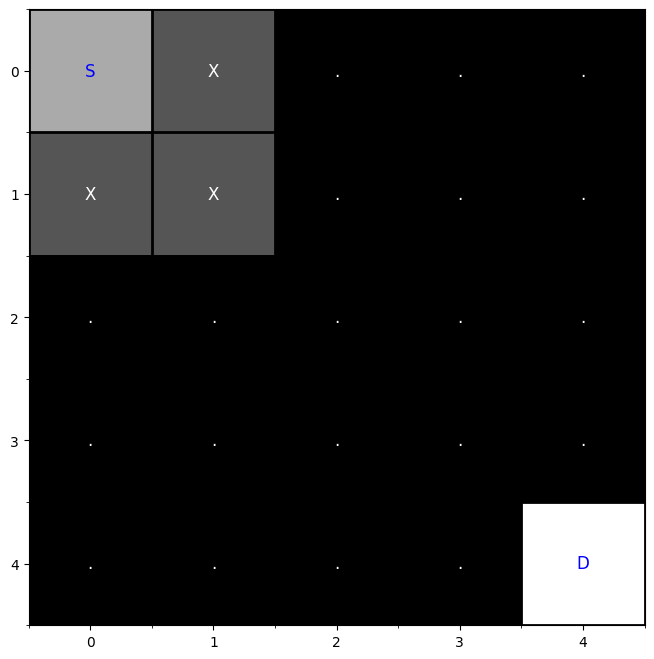

No path found.


In [14]:
# Test Case 4: NO PATH
warehouse_map = [
    ['S', 'X', '.', '.', '.'],
    ['X', 'X', '.', '.', '.'],
    ['.', '.', '.', '.', '.'],
    ['.', '.', '.', '.', '.'],
    ['.', '.', '.', '.', 'D']
]

start, end = find_start_end(warehouse_map)
pathfinder = DijkstraPathfinder(warehouse_map)
total_cost, path = pathfinder.dijkstra(start, end)

if path:
    print("NO PATH Grid:")
    for row in warehouse_map:
        print(' '.join(row))
    print()

    print("Path:", path)
    print("Total cost:", total_cost, "\n")
    print_grid_with_path(warehouse_map, path)

    grid_path_visualization(warehouse_map, path)
else:
    print("NO PATH Grid:")
    for row in warehouse_map:
        print(' '.join(row))
    print()
    grid_path_visualization(warehouse_map, path)
    
    print("No path found.")